# Exploratory data analysis

The NBA is a league of constant turnover, where young stars emerge and veteran careers wind down. This notebook dives into an NBA player dataset to identify factors that can help us predict a player's remaining time in the league. Through Exploratory Data Analysis (EDA), we'll explore trends and relationships that can inform models capable of forecasting a player's longevity over the next five years.

This analysis utilizes an NBA player dataset. Descriptions of the data fields can be found in the accompanying [README](../README.md) file.

Our primary objective is to leverage EDA to uncover patterns in the data that can be used to build robust models. These models will aim to predict a player's remaining career length in the NBA, specifically focusing on the next five years.

In [1]:
import os
import pandas as pd
import matplotlib

%matplotlib widget
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = None

## Global variables

In [2]:
DATA_INPUT_PATH = "../data/inputs"
DATA_OUTPUT_PATH = "../data/outputs"

## Data Import

In [3]:
data = pd.read_csv(os.path.join(DATA_INPUT_PATH, "nba_logreg.csv"))
print(f'data shape: {data.shape}')
data.head()

data shape: (1340, 21)


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Data Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

The table reveals **11 missing values in the "3P%" variable**. This likely occurs when a player attempted zero three-point shots (3PA = 0) during their season, resulting in division by zero.

In [5]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


- Players average 60 games played and 17.62 minutes per game, with significant variation.
- Players average 6.8 points per game on 2.6 field goals from 5.9 attempts.
- The average field goal percentage is 44%, with a low range of shooting efficiency: 75% of players shooting below 47%.
- Players average only 0.25 three-pointers made on 0.78 attempts, with a success rate of around 19%.
- There are 11 missing values in 3P%, suggesting some players haven't attempted a three-pointer in their career.
- Players average 1.3 free throws made on 1.8 attempts, with a success rate of approximately 70%.
- Players average 3 rebounds per game, with roughly equal contributions from offensive and defensive rebounds (1.0 and 2.0 rebounds, respectively).
- Players average 1.5 assists, 0.6 steals, 0.4 blocks, and 1.2 turnovers per game.

In [6]:
data[data["TARGET_5Yrs"]==1].describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,826.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.00000,831.000000,831.0
mean,65.826715,19.690253,7.878700,3.047413,6.708063,45.260048,0.258604,0.794224,19.265496,1.526955,2.128400,71.183394,1.187726,2.328640,3.516486,1.752347,0.692178,0.43911,1.347533,1.0
std,15.379812,8.581751,4.652551,1.794024,3.858556,5.508575,0.417618,1.135481,16.474446,1.074612,1.440202,9.950483,0.840105,1.451156,2.208026,1.623945,0.439440,0.48341,0.771146,0.0
min,16.000000,4.400000,1.000000,0.400000,0.800000,29.200000,0.000000,0.000000,0.000000,0.100000,0.100000,28.600000,0.100000,0.300000,0.400000,0.000000,0.000000,0.00000,0.100000,1.0
25%,54.500000,12.600000,4.500000,1.700000,3.800000,41.600000,0.000000,0.000000,0.000000,0.800000,1.100000,65.900000,0.500000,1.300000,1.900000,0.700000,0.400000,0.10000,0.800000,1.0
50%,71.000000,18.700000,6.800000,2.600000,5.700000,45.100000,0.000000,0.200000,22.200000,1.200000,1.800000,71.900000,1.000000,2.000000,3.000000,1.200000,0.600000,0.30000,1.200000,1.0
75%,79.000000,25.750000,10.100000,3.900000,8.600000,48.600000,0.400000,1.100000,33.000000,1.900000,2.700000,78.100000,1.600000,3.100000,4.600000,2.300000,0.900000,0.60000,1.700000,1.0
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.90000,4.400000,1.0


Compared to overall averages, players retained after 5 years in the NBA show better performance in most categories:

- Played more games (65.8 vs. 60.4)
- Played more minutes (19.7 vs. 17.6)
- Scored more points (7.9 vs. 6.8)
- Had slightly similar field goal percentage (45.3 vs. 44.2)
- Made similar three-pointers (0.26 vs 0.25) with a similar attempt rate (0.79 vs 0.78) and shooting around 19% from three.
- Had more rebounds (3.5 vs 3.0)
- Had more assists (1.8 vs 1.5)
- Had more steals (0.7 vs 0.6)
- Had similar blocks (0.4 vs 0.4)
- Committed slightly fewer turnovers (1.3 vs 1.2)

## KDE Analysis: Performance Differences Between Retained and Non-Retained NBA Players

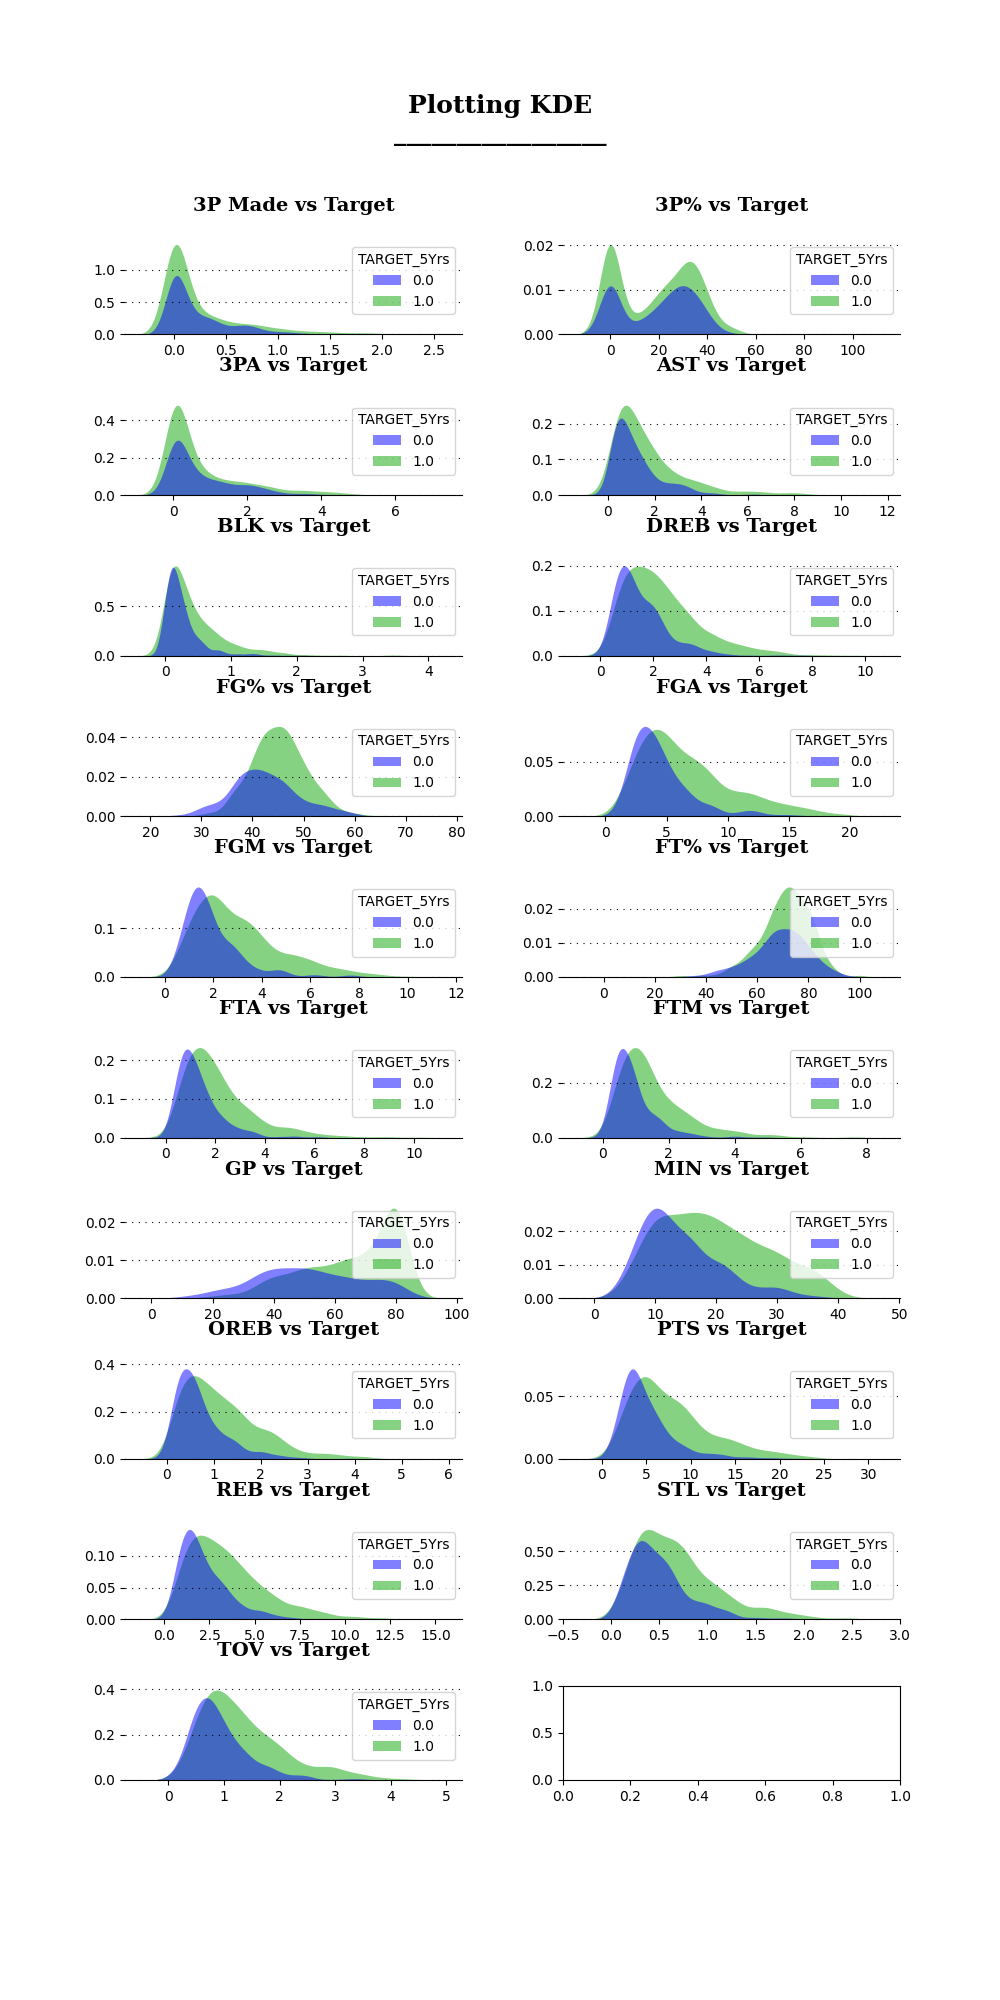

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

fig, axis = plt.subplots(10, 2, figsize=(10, 20))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
axis = axis.flatten()

fig.suptitle('Plotting KDE\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold', fontfamily='serif', color="black")

def plot_kde(ax, y):
    ax.set_title(f'{y} vs Target\n', fontsize=14, fontweight='bold', fontfamily='serif')
    sns.kdeplot(data=data, x=f'{y}', ax=ax, hue='TARGET_5Yrs', fill=True, palette=['blue', '#0ca607'], linewidth=0, alpha=0.5)
    ax.grid(True, axis='y', color='black', linestyle=':', dashes=(1,5))
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    for border in ["top", "right", "left"]:
        ax.spines[border].set_visible(False)

for ax, column in zip(axis, data.columns.difference(["Name", "TARGET_5Yrs"])):
    plot_kde(ax, column)

plt.show()

- Games Played (GP): Retained players show a clear tendency to have played more games throughout their careers.
- Minutes Played (MP): Similar to games played, retained players tend to have logged more minutes on average.
- Points Scored (PTS): The distribution for retained players is shifted towards higher points scored, indicating they were generally more productive scorers.
- Field Goal Percentage (FG%) and Free Throw Percentage (FT%): While the trend leans slightly towards higher percentages for retained players, the distributions have more overlap, suggesting these might not be the most distinguishing factors.
- Rebounds (REB), Assists (AST), Steals (STL): Retained players show a clear advantage in these hustle metrics, with their distributions shifted towards higher values.
- Blocks (BLK): The distributions for blocks are similar, suggesting that blocks might not be a strong differentiator between the two groups.
- Turnovers (TOV): Retained players seem to have a slightly lower tendency for turnovers, although there's some overlap in the distributions.

## Generate a Detailed EDA Report

We'll perform a detailed Exploratory Data Analysis (EDA) to understand the characteristics of our data. We'll utilize the pandas-profiling library to generate a comprehensive report for each feature in our dataset. This EDA report will be a valuable resource during the training phase as it provides a detailed overview of the data.

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="NBA Player Statistics")
profile.to_file(os.path.join(DATA_OUTPUT_PATH, "nba_player_report.html")) 
print(f'Report saved at: {os.path.join(DATA_OUTPUT_PATH, "nba_player_report.html")}')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report saved at: ../data/outputs/nba_player_report.html


## Data Cleaning: Ensuring Consistency
In this section, we'll focus on ensuring the consistency of our data. This involves identifying and addressing issues like:

- Missing Values: We'll identify and handle missing values (NaNs) in the data.
- Duplicate Rows: We'll check for and remove duplicate rows that might skew our analysis.
- Inconsistent Target Values: We'll pay particular attention to the target variable and identify any potential inconsistencies in how values are represented (e.g., duplicate names with different target values of 0 and 1).

### Missing Values

In [9]:
data[data.isna().any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


Based on the data, missing values in the "3P%" feature appear when the "3PA" feature is zero. We will impute these missing values with 0, as observed in similar datasets where missing values were filled with 0 (as shown in the table below).

In [10]:
data.query("`3P Made` == 0 and `3PA` == 0")

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
12,Lorenzo Williams,27,6.6,1.3,0.6,1.3,47.2,0.0,0.0,0.0,0.1,0.3,28.6,0.6,1.4,2.0,0.2,0.2,0.6,0.3,1.0
14,Elmore Spencer,44,6.4,2.4,1.0,1.9,53.7,0.0,0.0,0.0,0.4,0.7,50.0,0.4,1.0,1.4,0.2,0.2,0.4,0.6,1.0
16,Stephen Howard,49,5.3,2.1,0.7,1.9,37.6,0.0,0.0,0.0,0.7,1.1,64.2,0.5,0.7,1.2,0.2,0.3,0.2,0.5,0.0
25,Larry Stewart,76,29.3,10.4,4.0,7.8,51.4,0.0,0.0,0.0,2.5,3.1,80.7,2.4,3.5,5.9,1.6,0.7,0.6,1.5,1.0
29,Donald Hodge,51,20.7,8.4,3.2,6.4,49.7,0.0,0.0,0.0,2.0,2.9,66.7,2.3,3.1,5.4,0.8,0.5,0.5,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,Clarence Weatherspoon,82,32.4,15.6,6.0,12.8,46.9,0.0,0.0,25.0,3.5,5.0,71.3,2.2,5.0,7.2,1.8,1.0,0.8,2.1,1.0
1316,Sean Rooks,72,29.0,13.5,5.1,10.4,49.3,0.0,0.0,0.0,3.3,5.4,60.2,2.7,4.7,7.4,1.3,0.5,1.1,2.2,1.0
1318,Anthony Avent,82,27.9,9.8,4.2,9.8,43.3,0.0,0.0,0.0,1.4,2.1,65.1,2.2,4.0,6.2,1.1,0.7,0.9,1.7,1.0
1330,Adam Keefe,82,18.9,6.6,2.3,4.6,50.0,0.0,0.0,0.0,2.0,2.9,70.0,2.1,3.2,5.3,1.0,0.7,0.2,1.2,1.0


In [11]:
# fill NaN values with 0
data.loc[data.isna().any(axis=1), "3P%"]=0

### Duplicate data

In [12]:
data[data.duplicated(keep=False)].head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
162,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,0.9,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,0.9,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
165,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,4.0,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,4.0,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
168,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,0.2,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0


We will drop duplicate rows based on all columns.

In [13]:
data = data.drop_duplicates()

### Duplicate Names with different target values 

In [14]:
data[data.duplicated(subset=data.columns.difference(["TARGET_5Yrs"]), keep=False)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
18,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,0.0
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1.0
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0
120,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,0.0
121,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1.0
126,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,1.0
127,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,0.0


There are duplicate player names in the data where their target values differ. As we lack information to definitively identify players who remain active after 5 years, we will drop these rows.

In [15]:
data = data.drop_duplicates(subset=data.columns.difference(["TARGET_5Yrs"]), keep=False)

### Duplicates Names

In [16]:
data[data.duplicated(subset=["Name"], keep=False)].sort_values(["Name", "GP"], ascending=False)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
198,Michael Anderson,65,18.5,7.4,2.9,5.8,50.1,0.0,0.1,0.0,1.5,2.7,57.1,1.8,2.7,4.5,1.0,1.0,0.3,1.2,0.0
197,Michael Anderson,36,20.3,5.7,2.0,4.9,41.7,0.0,0.2,14.3,1.6,2.3,69.5,1.2,1.3,2.5,4.3,1.2,0.1,2.3,0.0
208,Mark Bryant,56,14.3,5.0,2.1,4.4,48.6,0.0,0.0,0.0,0.7,1.2,58.0,1.2,2.0,3.2,0.6,0.4,0.1,0.7,1.0
209,Mark Bryant,36,7.0,1.6,0.7,1.6,43.1,0.0,0.0,0.0,0.3,0.4,69.2,0.7,1.2,1.9,0.2,0.1,0.1,0.3,1.0
461,Jeff Taylor,77,19.6,6.1,2.2,5.2,43.1,0.7,2.0,34.4,1.0,1.3,72.8,0.7,1.3,1.9,0.8,0.6,0.2,0.6,0.0
460,Jeff Taylor,44,17.6,3.6,1.5,3.6,40.0,0.0,0.0,0.0,0.7,1.0,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,0.0
1094,Jamie Feick,41,15.2,3.7,1.4,3.8,35.7,0.1,0.3,35.7,0.8,1.6,50.7,2.0,3.2,5.2,0.6,0.4,0.3,0.8,1.0
1093,Jamie Feick,28,30.4,6.3,2.4,4.8,50.0,0.0,0.0,0.0,1.5,2.1,71.7,4.0,6.3,10.3,0.9,0.9,0.6,1.2,1.0
565,James Johnson,68,14.4,5.3,1.9,3.5,54.2,0.0,0.0,0.0,1.5,2.5,59.4,1.6,3.0,4.5,0.6,0.1,1.1,1.0,1.0
566,James Johnson,65,11.6,3.9,1.5,3.2,45.2,0.2,0.7,32.6,0.8,1.1,72.9,0.5,1.4,2.0,0.7,0.3,0.7,0.9,1.0


To address duplicate player names, we will prioritize retaining the most recent data for each player. This will involve selecting the row with the highest value in the "GP" feature.

In [17]:
data = data.sort_values(["Name", "GP"], ascending=False).drop_duplicates(subset=["Name"], keep='first')

## Save preprocessed data

In [20]:
data.to_csv(os.path.join(DATA_OUTPUT_PATH, "preprocessed_nba_data.csv"), index=False)
print(f"processed data saved at: {os.path.join(DATA_OUTPUT_PATH, 'preprocessed_nba_data.csv')}")

processed data saved at: ../data/outputs/preprocessed_nba_data.csv
